In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.3MB 8.7MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
import tensorflow as tf

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
import tqdm 
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)
# tf.enable_eager_execcution()

2.2.0


In [6]:
dataset,metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteRFMKJQ/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteRFMKJQ/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images/=255
  return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()


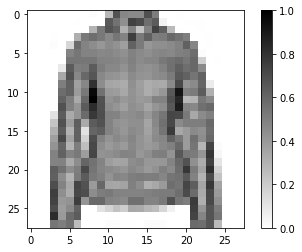

In [10]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))


plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

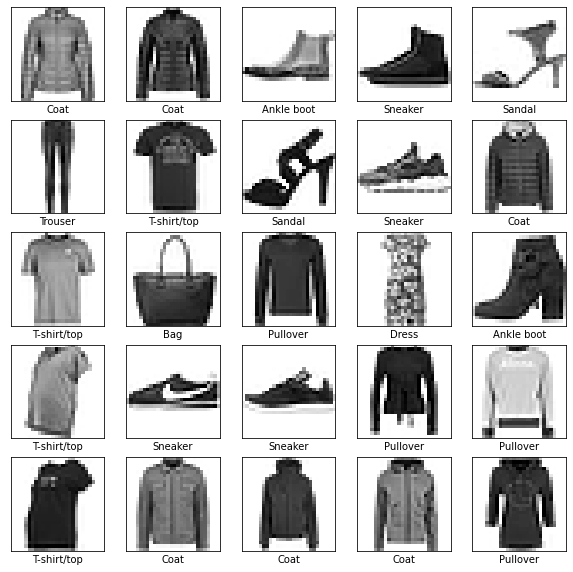

In [11]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
                            
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [0]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=30, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7107 - accuracy: 0.7687
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4834 - accuracy: 0.8370
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4369 - accuracy: 0.8509
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4066 - accuracy: 0.8595
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3914 - accuracy: 0.8640
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3791 - accuracy: 0.8674
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3575 - accuracy: 0.8754
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3557 - accuracy: 0.8754
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3406 - accuracy: 0.8806
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.338

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3340 - accuracy: 0.8810
Accuracy on test dataset: 0.8809999823570251


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  

In [18]:
predictions.shape


(32, 10)

In [19]:
predictions[0]

array([ -0.69010144,  -3.8461883 ,   3.3219402 ,  -5.0419226 ,
         7.5312448 , -13.021375  ,   4.738801  , -11.502881  ,
        -3.3255103 , -16.262146  ], dtype=float32)

In [20]:
np.argmax(predictions[0])

4

In [21]:
test_labels[0]

4

In [22]:
i=np.argmax(predictions[0])
print(class_names[i])

Coat


So, Now we try to implement the model to few more test_images and see the prediction


In [23]:
img = test_images[0]
pic = img
print(img.shape)

(28, 28, 1)


In [24]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [25]:
pred=model.predict(img)
i = np.argmax(pred)
print (class_names[i])

Coat


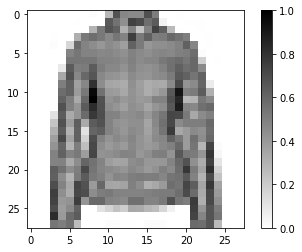

In [26]:
pic = pic.reshape((28,28))
plt.figure()
plt.imshow(pic, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Now lets test it on realtime Data


In [0]:
from google.colab import files
# from Python.display import Images

In [67]:
uploaded = files.upload()

Saving tshirt.png to tshirt.png


In [0]:
from PIL import Image
from IPython.display import display

In [74]:
!wget -O tshirt.png https://cdn.pixabay.com/photo/2016/12/06/09/31/blank-1886008_1280.png

# my_image = tf.keras.preprocessing.image.load_img('/content/sneakers.jpg', color_mode = "grayscale", target_size=(28,28))

--2020-05-17 08:02:04--  https://cdn.pixabay.com/photo/2016/12/06/09/31/blank-1886008_1280.png
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 597629 (584K) [image/png]
Saving to: ‘tshirt.png’

tshirt.png          100%[===================>] 583.62K  --.-KB/s    in 0.02s   

2020-05-17 08:02:04 (37.5 MB/s) - ‘tshirt.png’ saved [597629/597629]



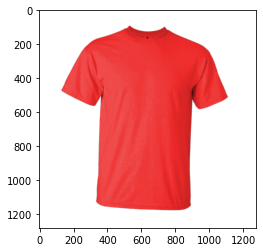

In [75]:
import matplotlib
an_image = matplotlib.image.imread("/content/tshirt.png")
img = Image.open("/content/tshirt.png")
plt.imshow(img)

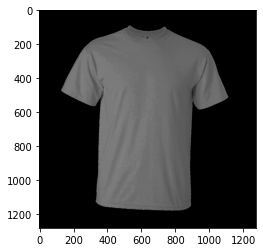

In [76]:
rgb_weights = [0.2989, 0.5870, 0.1140]
an_image = np.array(img)
grayscale_image = np.dot(an_image[...,:3], rgb_weights)
an_image = Image.fromarray(grayscale_image)
plt.imshow(an_image, cmap=plt.get_cmap("gray"))

(1, 28, 28)


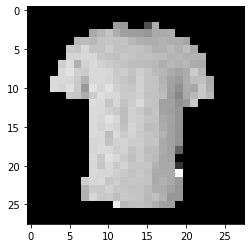

In [77]:
import cv2
new_img=cv2.resize(grayscale_image, (28,28))
plt.imshow(new_img, cmap=plt.get_cmap("gray"))
new_img=np.array([new_img])
print(new_img.shape)

In [78]:
my_pred=model.predict(new_img)
flag = np.argmax(my_pred)
print (class_names[flag])
print(my_pred)

T-shirt/top
[[  886.341    -356.9327    355.62827   -83.01244  -157.84052 -2891.4998
    747.6732  -2210.8867    207.91953 -2084.9075 ]]
